In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


   Price   Open   High    Low     Vol. Change %
0  43.06  42.54  43.08  42.31  102.22M    1.77%
1  43.06  43.13  43.64  42.99  118.07M    0.00%
2  43.26  43.13  43.37  43.02   89.74M    0.46%
3  43.75  43.36  43.84  43.26   94.64M    1.13%
4  43.59  43.59  43.90  43.48   82.27M   -0.37%


In [13]:
# 2.  chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 'scale'}
Best score: 1.69102313059927


In [15]:


y_pred = svr_rbf.predict(x_test)
y_pred


array([172.40391758, 172.09922748, 172.58043469, 173.1275962 ,
       172.60982472, 171.77397108, 171.70486225, 171.49730381,
       173.75856962, 174.86253822, 173.24443015, 171.94164094,
       170.99186086, 172.45298023, 174.26944232, 177.28582413,
       177.6118472 , 178.30017619, 179.73787349, 182.27187246,
       178.30017619, 179.25180007, 178.93192412, 180.11560057,
       181.45907248, 181.6618665 , 181.84711309, 183.4033294 ,
       183.72390492, 183.10959299, 182.61268216, 183.75749248,
       184.10078071, 184.41397502, 184.62525786, 185.50098767,
       185.592928  , 187.45657021, 187.26560492, 186.94070243,
       186.54490337, 186.81835597, 185.5498346 , 185.165551  ,
       186.40201901, 186.16327985, 186.15846511, 187.40768522,
       187.41078421, 188.15687473, 187.93691912, 187.59693509,
       187.58050975, 187.44448893, 187.76571388, 188.05207964,
       187.96502248, 187.94051937, 187.98177443, 187.65273544,
       186.69496936, 183.98320428, 180.85413737, 178.43

In [16]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[195.69]])

In [17]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([187.77722283]),
 array([184.24087472]),
 array([181.73223121]),
 array([179.69745983]),
 array([177.92401246]),
 array([176.30601584]),
 array([174.78250011]),
 array([173.31494334]),
 array([171.87750407]),
 array([170.45226199]),
 array([169.02671531]),
 array([167.59238676]),
 array([166.1439967]),
 array([164.67891969]),
 array([163.19676405]),
 array([161.6989818]),
 array([160.18846174]),
 array([158.66909268]),
 array([157.14531003]),
 array([155.62165565]),
 array([154.1023864]),
 array([152.59116212]),
 array([151.09083147]),
 array([149.60331885]),
 array([148.12960243]),
 array([146.66976456]),
 array([145.22309244]),
 array([143.78820834]),
 array([142.36321234]),
 array([140.94582598])]

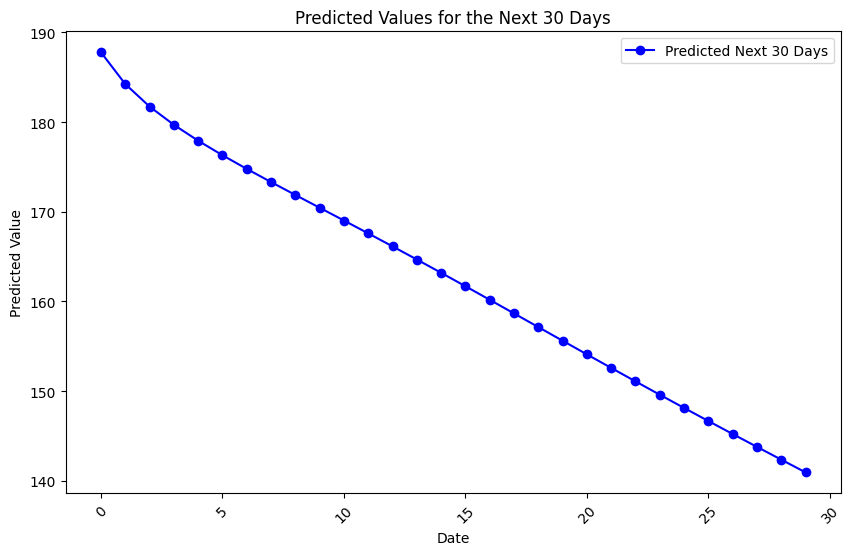

In [18]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [19]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [20]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 3.080571198515571
Testing MAPE: 0.01260477865893058
Testing MAE: 2.360070624496622


In [21]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 3.080571198515571
Testing MAPE: 0.01260477865893058
Testing MAE: 2.360070624496622


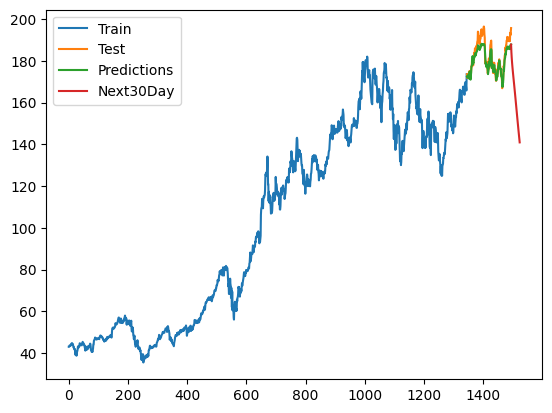

In [22]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()